In [90]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings (2).csv


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [92]:
# Load the Dataset
df = pd.read_csv("hotel_bookings.csv")

# Dataset shape
df.shape

(119390, 32)

In [93]:
# Display the First Few Rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [94]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [95]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [96]:
# Calculate missing values and their percentage
missing_values = df.isnull().sum()
missing_percentage = ((missing_values / len(df)) * 100).round(2)

# Create a DataFrame to display missing values and percentages
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Filter to show only columns with missing values and sort by percentage
missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

# Display the missing information
missing_info

,Missing Values,Percentage
company,112593,94.31
agent,16340,13.69
country,488,0.41
children,4,0.00


In [97]:
# Select only numerical columns
df_numerical = df.select_dtypes(include=['number'])

# Display the first few rows of the numerical DataFrame
df_numerical.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,NaN,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,NaN,0,98.0,0,1


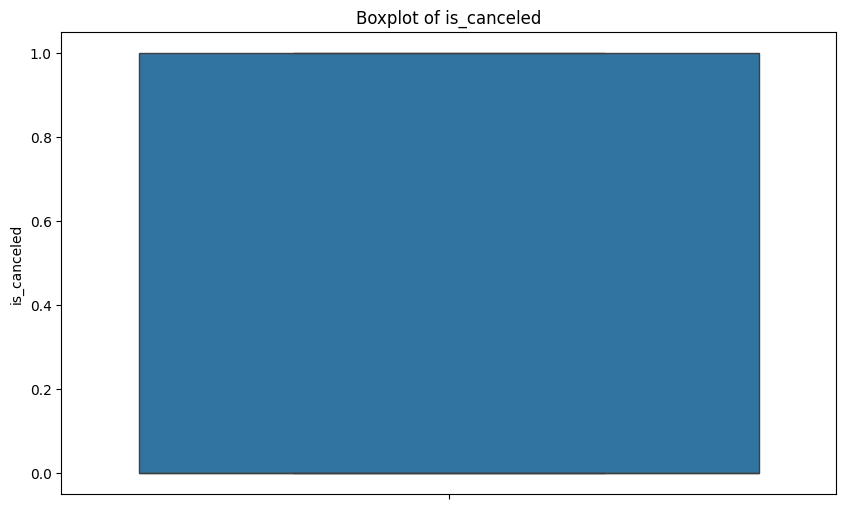

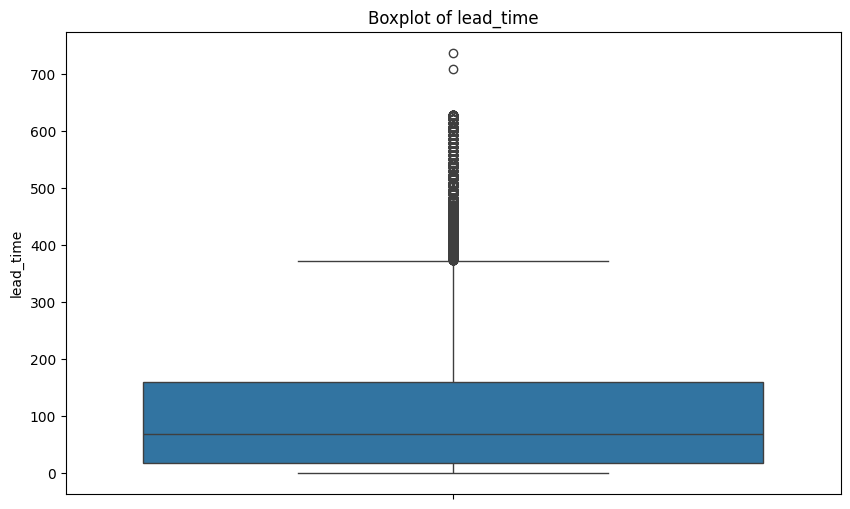

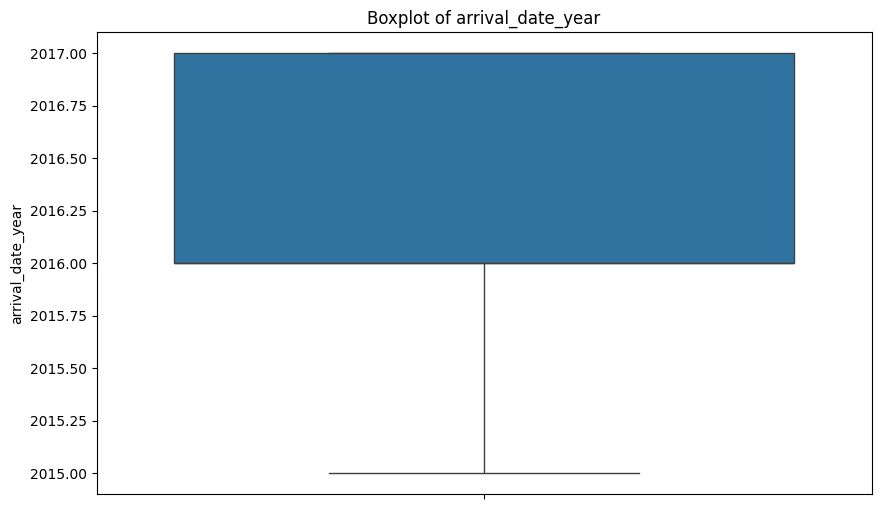

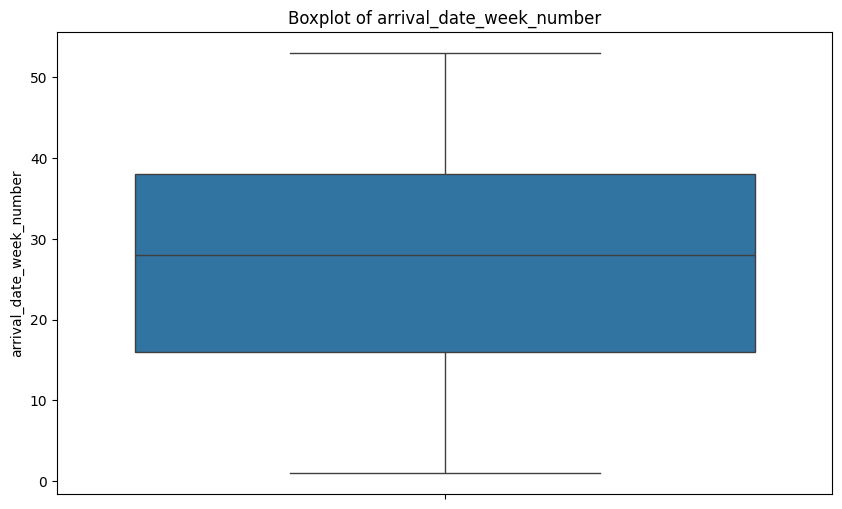

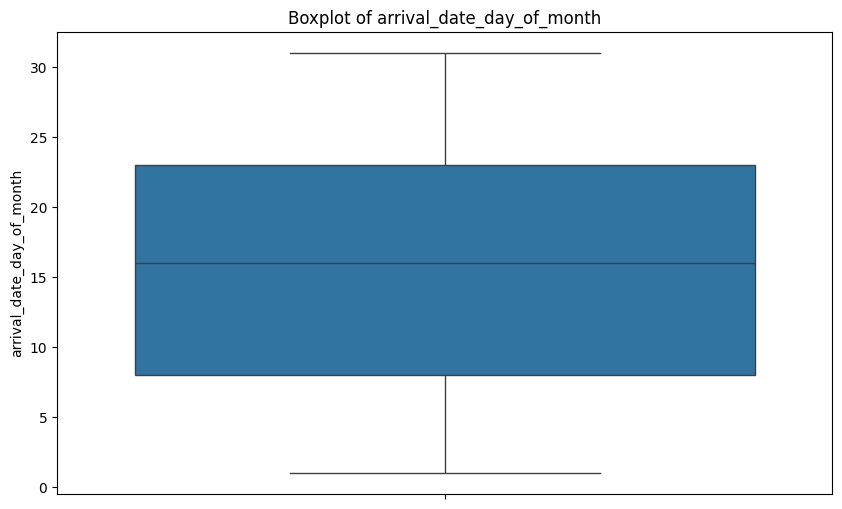

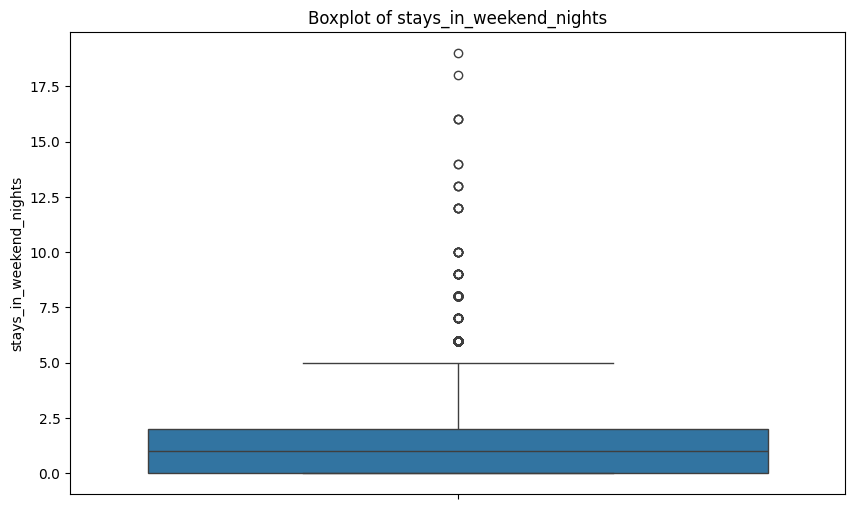

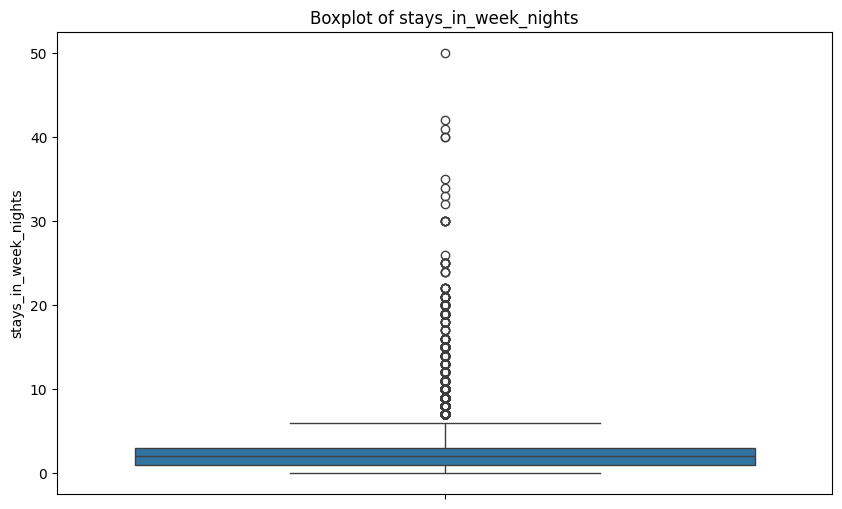

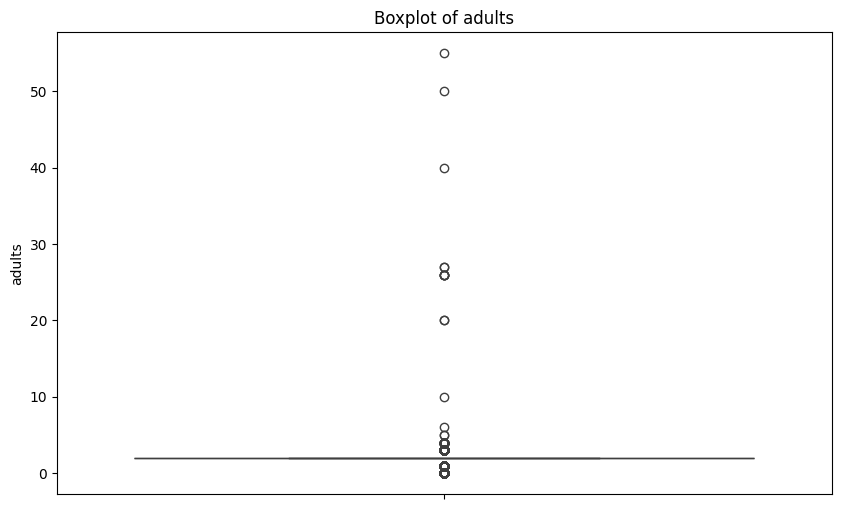

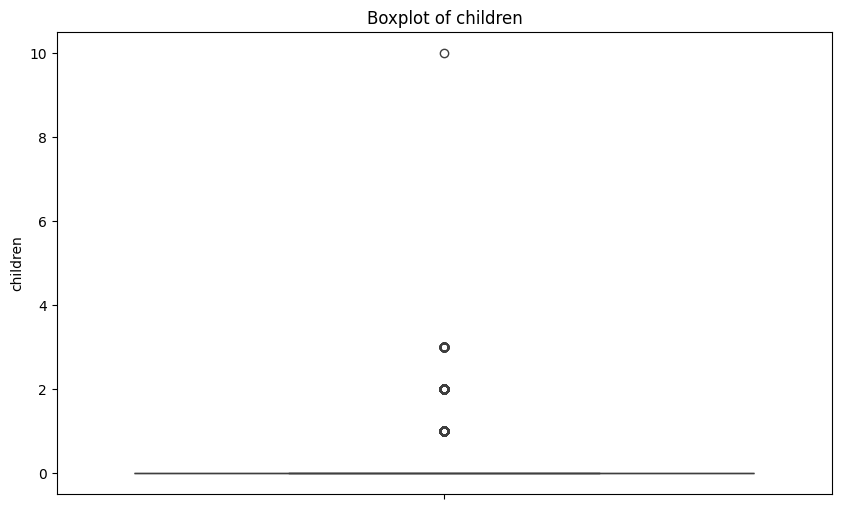

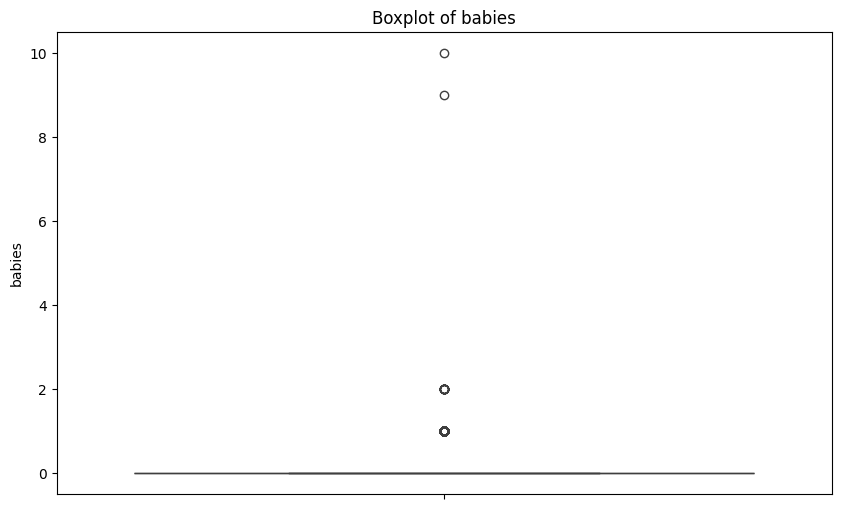

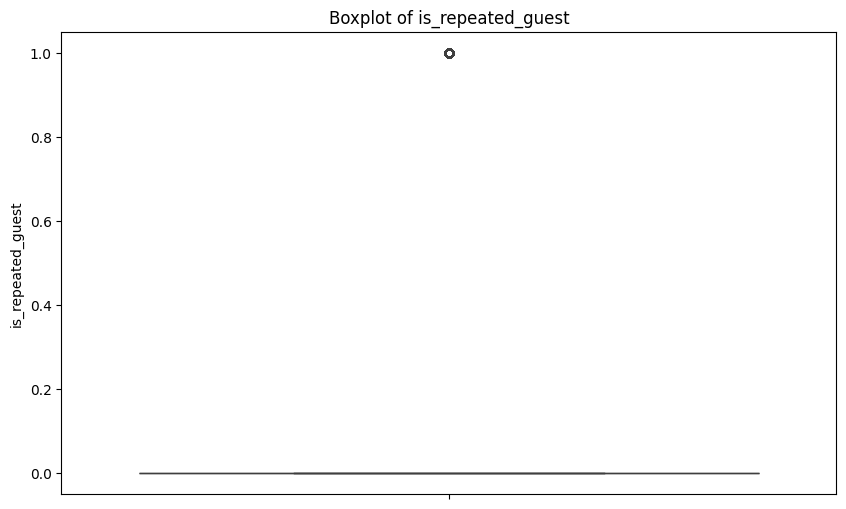

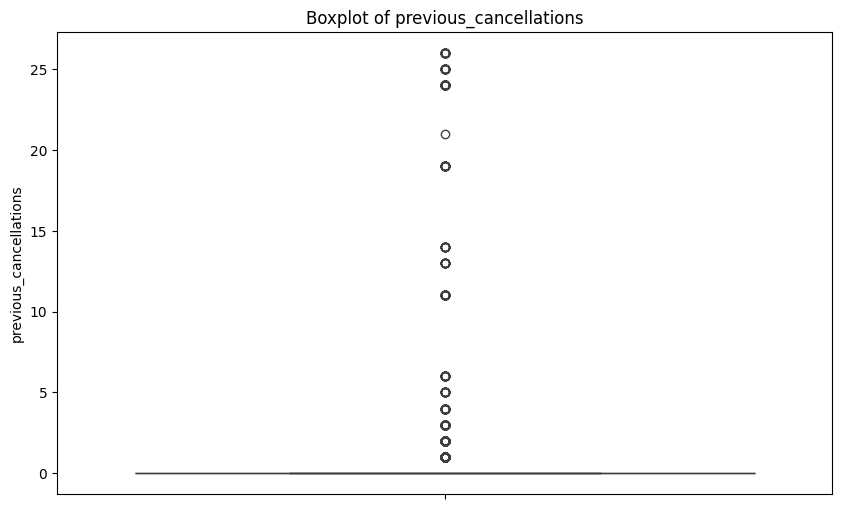

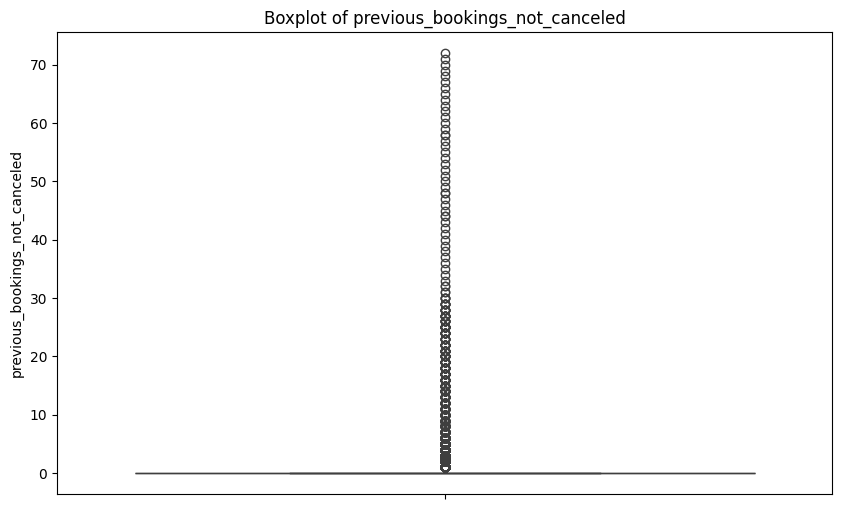

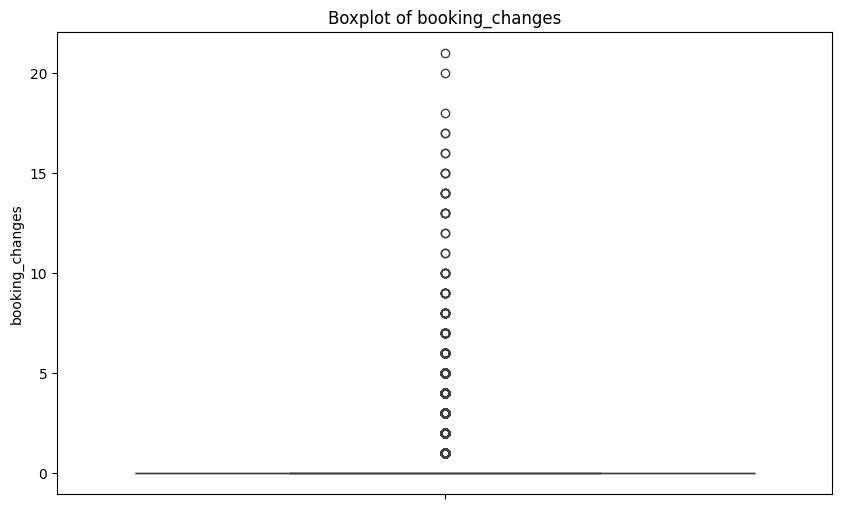

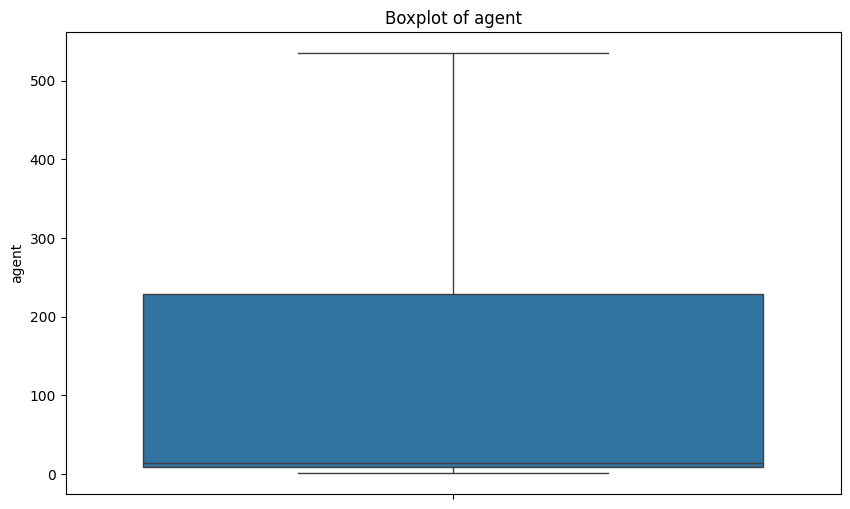

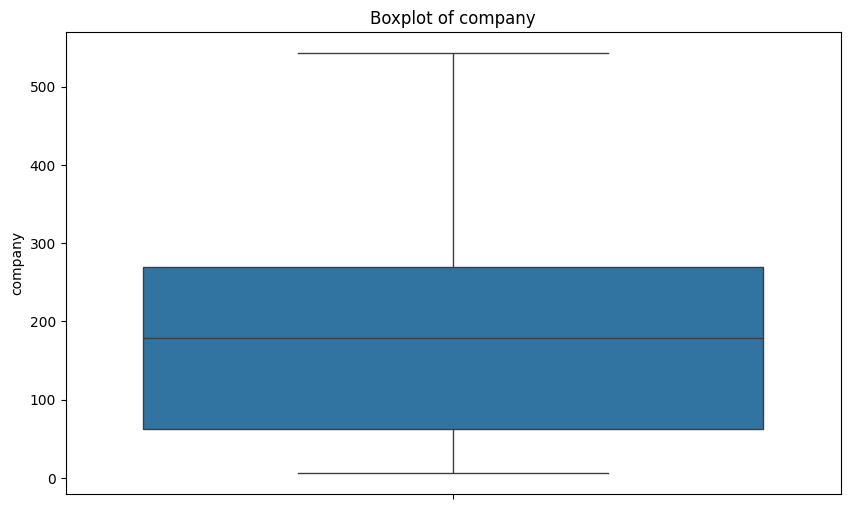

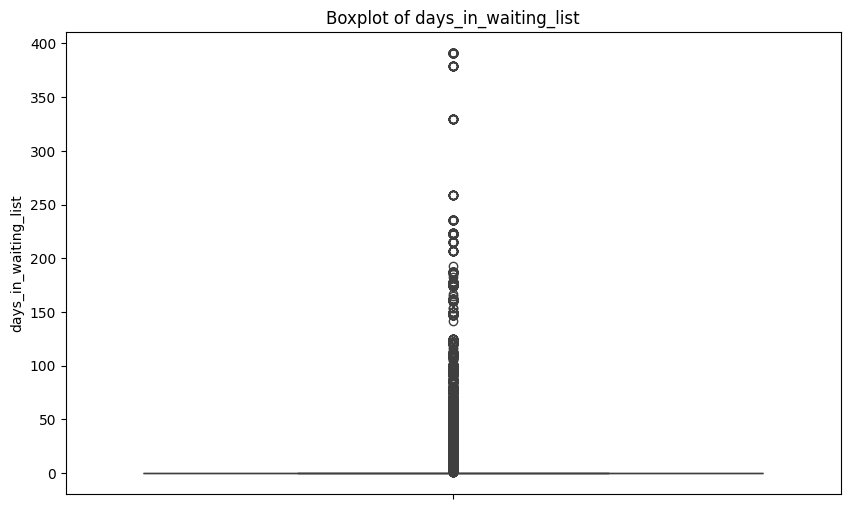

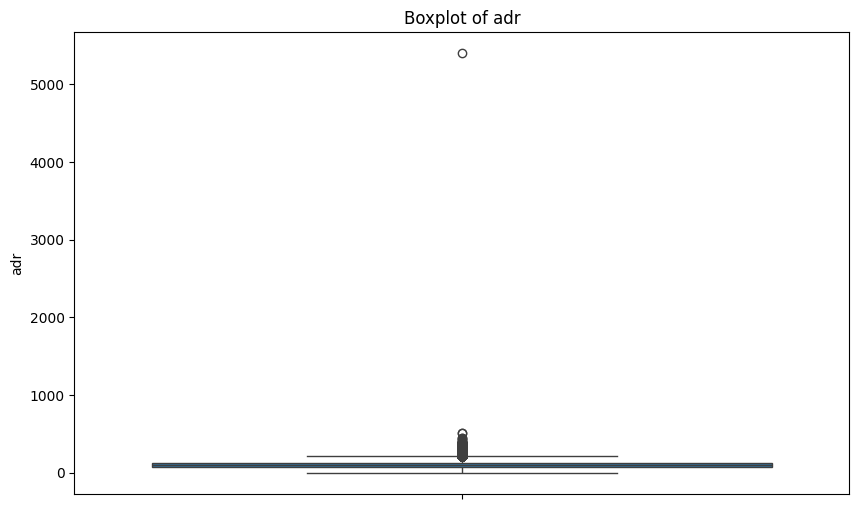

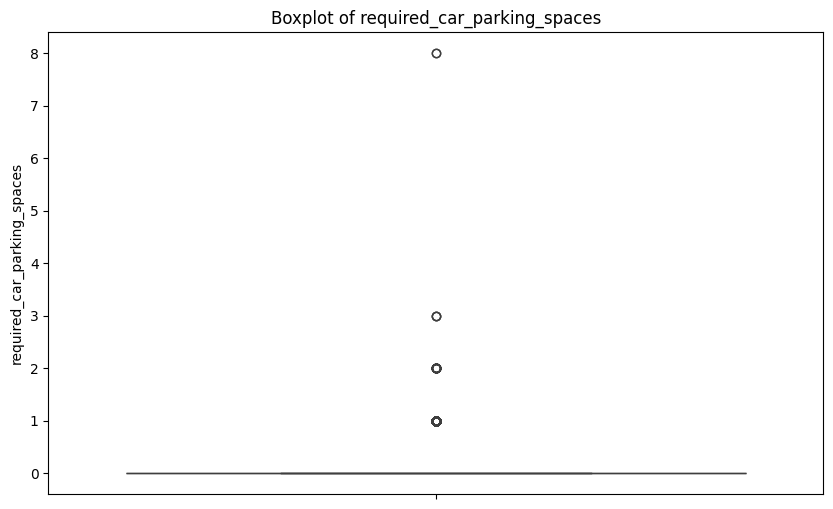

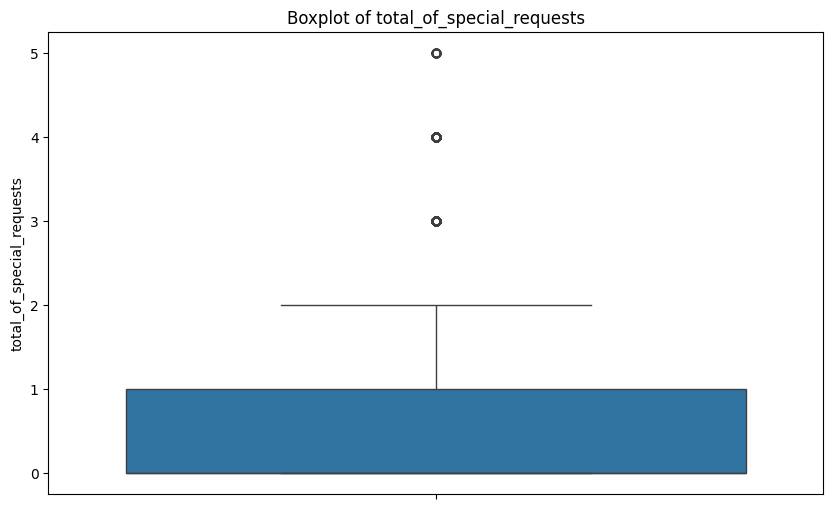

In [98]:
# Generate boxplots for numerical columns
for column in df_numerical.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df_numerical[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [99]:
outliers_count = {}

for column in df_numerical.columns:
    Q1 = df_numerical[column].quantile(0.25)
    Q3 = df_numerical[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    count = df_numerical[(df_numerical[column] < lower_bound) | (df_numerical[column] > upper_bound)].shape[0]
    outliers_count[column] = count

# Convert the outliers_count dictionary to a DataFrame
outliers_df = pd.DataFrame(outliers_count.items(), columns=['Column', 'Outlier Count'])

# Sort the DataFrame by 'Outlier Count' in descending order
outliers_df = outliers_df.sort_values(by='Outlier Count', ascending=False)

# Display the DataFrame
display(outliers_df)

,Column,Outlier Count
7,adults,29710
13,booking_changes,18076
8,children,8590
18,required_car_parking_spaces,7416
11,previous_cancellations,6484
10,is_repeated_guest,3810
17,adr,3793
16,days_in_waiting_list,3698
12,previous_bookings_not_canceled,3620
6,stays_in_week_nights,3354


## Summary:

*   The 'adults' column had the highest number of outliers (29,710), followed by 'booking\_changes' and 'children'.
*   Several columns, including 'is\_canceled', 'arrival\_date\_year', and 'agent', had no detected outliers.


In [100]:
# drop company column
df = df.drop(columns='company')

# Create a dictionary with column names and their respective fill values
fill_values = {
    'children': df.children.mode()[0],
    'country': 'Unknown',
    'agent': 0
}

# Fill the missing values using the dictionary
df.fillna(fill_values, inplace=True)

# Display the number of missing values after filling
df.isnull().sum().sum()

np.int64(0)

In [101]:
# Check for duplicates
duplicates_count = df.duplicated().sum()

if duplicates_count > 0:
    print(f"\n⚠️ Found {duplicates_count} duplicate rows. Removing them...")
    df = df.drop_duplicates().reset_index(drop=True)
else:
    print("\n✅ No duplicates found.")


⚠️ Found 32001 duplicate rows. Removing them...


In [102]:
# Make a copy of the full DataFrame
df_capped = df.copy()

for column in df_capped.select_dtypes(include=['number']).columns:
    Q1 = df_capped[column].quantile(0.25)
    Q3 = df_capped[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the values instead of removing them
    df_capped[column] = np.where(df_capped[column] > upper_bound, upper_bound,
                          np.where(df_capped[column] < lower_bound, lower_bound, df_capped[column]))

df = df_capped.copy()

In [103]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'].astype(str) + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format="%Y-%B-%d",   # %B = full month name
    errors='coerce'
)

In [104]:
# Add new feature
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_family'] = ((df['children'] + df['babies']) > 0).astype(int)

In [105]:
# Remove Data Leakage
df = df.drop(['reservation_status', 'reservation_status_date'], axis=1, errors='ignore')

In [106]:
# Encode Categorical Variables
categorical_cols = [
    'meal', 'country', 'market_segment',
    'distribution_channel', 'reserved_room_type',
    'assigned_room_type', 'deposit_type', 'customer_type'
]

numeric_cols = [col for col in df.columns if col not in categorical_cols + ['is_canceled']]

# Separate features and target
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# One-Hot Encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform categorical columns
encoded_cats = encoder.fit_transform(X[categorical_cols])

# Get encoded column names
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# Create DataFrame with encoded variables
X_encoded = pd.DataFrame(encoded_cats, columns=encoded_cols, index=X.index)

# Combine numeric + encoded categorical features
X_final = pd.concat([X[numeric_cols], X_encoded], axis=1)

print("✅ Final feature matrix shape:", X_final.shape)

X = X_final.copy()

✅ Final feature matrix shape: (87389, 249)


In [107]:
# Final Preparation - Train/Val/Test Split (60% train, 20% val, 20% test)

# First split train+val vs test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Then split train vs val
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)


print("✅ Dataset shapes:")
print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

✅ Dataset shapes:
Train: (52433, 249) Val: (17478, 249) Test: (17478, 249)
